In [591]:
import jax
from jax import vmap, grad, jit 
import jax.numpy as np
import jax.scipy as sp
import matplotlib.pyplot as plt
plt.style.use('dark_background')
b = 0.265
plt.rcParams['axes.facecolor'] = (b, b+0.01, b+0.01)
plt.rcParams['figure.facecolor'] = (b, b+0.01, b+0.01)

# Relation of Entropy Estimation to space Dimentionality

In [563]:
n = 10000
dim = 1
key, subkey = jax.random.split(jax.random.PRNGKey(23012023))
R = jax.random.normal(key, shape=(n, dim))

In [564]:
A = sp.stats.norm.pdf(np.sqrt(np.square(R[np.newaxis, :, :] - R[:, np.newaxis, :]).sum(2)), loc=0, scale=1/100)

In [565]:
-np.log((A * sp.stats.norm.pdf(0)**(dim-1)).mean(0)).mean() 

Array(1.4023246, dtype=float32)

In [566]:
def multivariate_logpdf(R):
    return sp.stats.norm.logpdf(R).sum(1) 

In [567]:
def multivariate_logpdf_dist(D, dim, scale=1):
    return sp.stats.norm.logpdf(D, scale=scale) + (dim - 1)*sp.stats.norm.logpdf(0, scale=scale)

In [532]:
(multivariate_logpdf(R) - multivariate_logpdf_dist(np.sqrt(np.square(R).sum(1)), R.shape[1])).max()

Array(1.1920929e-07, dtype=float32)

In [533]:
def theoretical(R):
    return -sp.stats.norm.logpdf(R).sum(1).mean()

In [534]:
theoretical(R)

Array(1.4215324, dtype=float32)

In [535]:
np.log(np.exp(vmap(lambda D: multivariate_logpdf_dist(D, dim-1, scale=1/np.sqrt(n)))(np.sqrt(np.square(R[np.newaxis, :, :] - R[:, np.newaxis, :]).sum(2)))).sum(0)).mean()

Array(4.121784, dtype=float32)

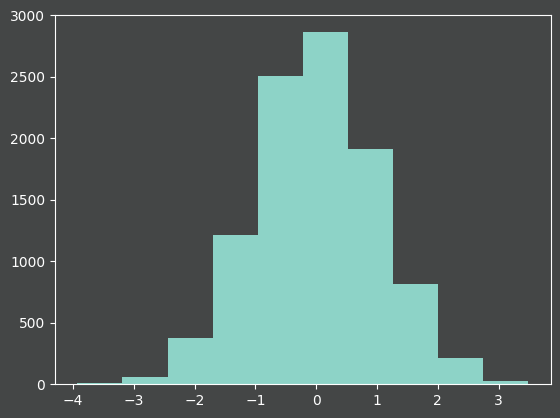

In [592]:
plt.hist(R.reshape(-1));

In [609]:
np.linalg.norm(np.array([1,1]))

Array(1.4142135, dtype=float32)

In [655]:
n = 10000
dim = 2
key, subkey = jax.random.split(jax.random.PRNGKey(23012023))
R = jax.random.normal(key, shape=(n, dim))

In [656]:
d = jit(lambda x, y: np.linalg.norm(x-y))
pdf = lambda scale: jit(lambda x: sp.stats.norm.pdf(vmap(d)(R[:5], np.repeat(x, R[:5].shape[0])), scale=scale).mean(0))

In [ ]:
np.repeat(np.array([[1,2]])

In [660]:
x = np.linspace(-10,10,1000).reshape(-1,1)
plt.plot(x.reshape(-1), vmap(pdf(1))(np.c_[x, np.ones(x.shape[0])]))

ValueError: vmap got inconsistent sizes for array axes to be mapped:
  * one axis had size 5: axis 0 of argument x of type float32[5,2];
  * one axis had size 10: axis 0 of argument y of type float32[10]